In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dropout, MaxPooling2D, Dropout, BatchNormalization, GaussianDropout, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
(x_train_full , y_train_full) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=.20, random_state=42)

In [ ]:
print('{}\n{}\n{}'.format(x_train.shape, x_val.shape, x_test.shape))
print('\n\n')
print('{}\n{}\n{}'.format(y_train.shape, y_val.shape, y_test.shape))

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)



(40000, 1)
(10000, 1)
(10000, 1)


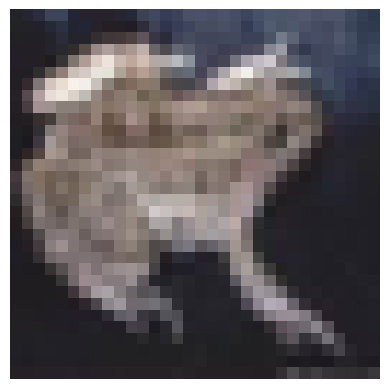

In [ ]:
plt.imshow(x_train[0])
plt.axis('off')
plt.grid(False)

<ipython-input-6-264baebe0caa>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


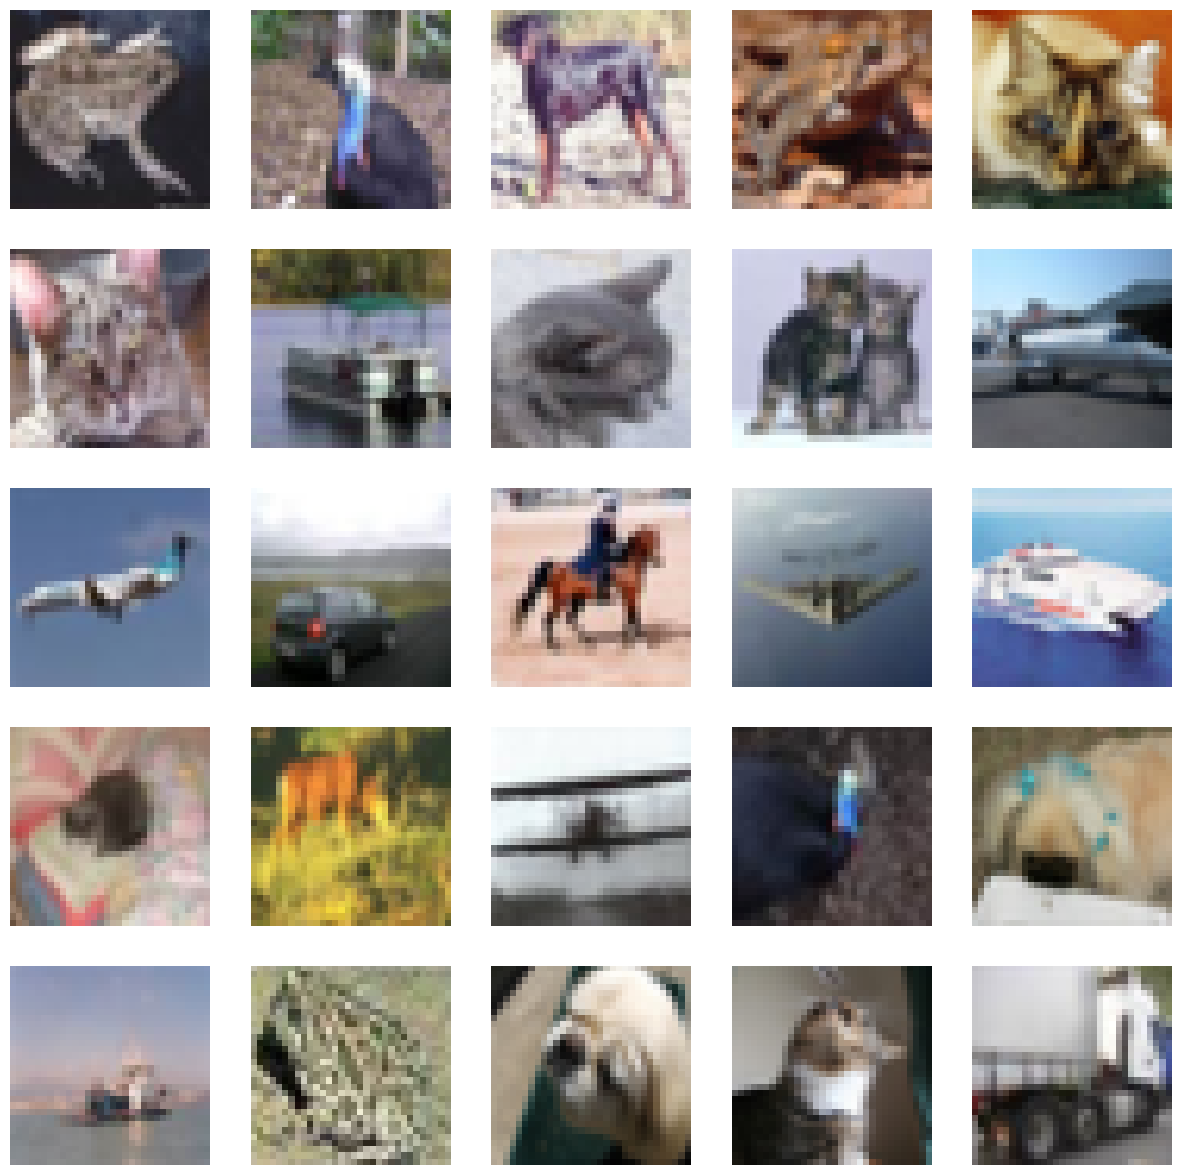

In [ ]:
plt.subplots(figsize=(15,15))
for i, pic in enumerate(x_train[0:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(pic)
    plt.axis('off')
    plt.grid(False)

In [ ]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
weight_decay = 1e-6
model=Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay), input_shape=(32,32,3)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    Conv2D(64,(3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Dropout(.2),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(weight_decay), padding='same'),
    MaxPooling2D((2,2)),
    Dropout(.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),

])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                     

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer= Adam(learning_rate=1e-5) , loss= sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           restore_best_weights=True, #in case if model misses the best_weights
                           verbose=2,
                           patience=20)

In [ ]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val), verbose=2,
          callbacks=[early_stop], batch_size=32, shuffle=True, workers=-1, use_multiprocessing=True)

Epoch 1/200
1250/1250 - 18s - loss: 1.3980 - accuracy: 0.4941 - val_loss: 1.3035 - val_accuracy: 0.5303 - 18s/epoch - 14ms/step
Epoch 2/200
1250/1250 - 16s - loss: 1.3111 - accuracy: 0.5252 - val_loss: 1.3214 - val_accuracy: 0.5250 - 16s/epoch - 13ms/step
Epoch 3/200
1250/1250 - 16s - loss: 1.2403 - accuracy: 0.5534 - val_loss: 1.2483 - val_accuracy: 0.5536 - 16s/epoch - 13ms/step
Epoch 4/200
1250/1250 - 16s - loss: 1.1846 - accuracy: 0.5759 - val_loss: 1.2006 - val_accuracy: 0.5782 - 16s/epoch - 13ms/step
Epoch 5/200
1250/1250 - 18s - loss: 1.1231 - accuracy: 0.5984 - val_loss: 1.1519 - val_accuracy: 0.5928 - 18s/epoch - 14ms/step
Epoch 6/200
1250/1250 - 16s - loss: 1.0712 - accuracy: 0.6190 - val_loss: 1.1327 - val_accuracy: 0.5993 - 16s/epoch - 13ms/step
Epoch 7/200
1250/1250 - 16s - loss: 1.0282 - accuracy: 0.6345 - val_loss: 1.0710 - val_accuracy: 0.6239 - 16s/epoch - 13ms/step
Epoch 8/200
1250/1250 - 16s - loss: 0.9848 - accuracy: 0.6494 - val_loss: 1.0488 - val_accuracy: 0.6319 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7587 - accuracy: 0.7752


[0.7586624622344971, 0.7752000093460083]

In [ ]:
model.history.history.keys()

dict_keys([])

In [ ]:
model.save('model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
